# Computational Theory Assessment

**Student:** Tiffany Yong Ngik Chee  (G00425067)    
**Module:** Computation Theory  
**Lecturer:** Ian McLoughlin

This notebook contains solutions to five problems related to the [SHA-256 Secure Hash Standard (FIPS 180-4)](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf).

---

## Problem 1: Binary Words and Operations

### Introduction

In this problem, I implement seven fundamental functions used in the SHA-256 cryptographic hash algorithm. These functions operate on 32-bit binary words and form the building blocks of the hash computation process.

All seven functions are defined in **Section 4.1.2** (pages 10-11) of the [Secure Hash Standard (FIPS 180-4)](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf). They perform bitwise logical operations and rotations that help ensure the security and unpredictability of the SHA-256 hash function.

### Why 32-bit Operations?

SHA-256 processes data in 32-bit chunks (called "words"). Using numpy's `uint32` type ensures that all operations treat numbers as **unsigned 32-bit integers**, preventing overflow issues and ensuring compatibility with the standard's specifications.

In [3]:
# Import numpy for 32-bit unsigned integer operations.
# NumPy documentation: https://numpy.org/doc/stable/
import numpy as np

---

### Function 1: Parity(x, y, z)

#### What is the Parity Function?

The `Parity` function is defined in **Section 4.1.2, equation (4.3)** on page 10 of the standard. It is defined as:

$$\text{Parity}(x, y, z) = x \oplus y \oplus z$$

where $\oplus$ represents the bitwise XOR (exclusive OR) operation.

#### Why is it Used?

The Parity function is used in certain rounds of the SHA-256 compression function (specifically in the SHA-1 algorithm, which shares some operations with SHA-256). It provides [diffusion](https://en.wikipedia.org/wiki/Confusion_and_diffusion), meaning that changing a single bit in any of the inputs will affect the output, making the hash function more secure.

#### How Does XOR Work?

The XOR operation compares corresponding bits of two binary numbers:
- If the bits are **different**, the result is `1`
- If the bits are the **same**, the result is `0`

For three inputs, we XOR them sequentially: first `x ⊕ y`, then XOR that result with `z`.

In [4]:
def Parity(x, y, z):
    """
    Calculate the Parity function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.3) of FIPS 180-4,
    this function returns the bitwise XOR of three 32-bit words.
    
    The formula is: Parity(x, y, z) = x ⊕ y ⊕ z
    
    Parameters
    ----------
    x : int or numpy.uint32
        First 32-bit word
    y : int or numpy.uint32
        Second 32-bit word
    z : int or numpy.uint32
        Third 32-bit word
        
    Returns
    -------
    numpy.uint32
        The bitwise XOR of x, y, and z
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    # Ensure all inputs are treated as 32-bit unsigned integers.
    # This prevents overflow and ensures compatibility with the standard.
    # See: https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.uint32
    x = np.uint32(x)
    y = np.uint32(y)
    z = np.uint32(z)
    
    # Perform bitwise XOR operation.
    # The ^ operator in Python performs bitwise XOR.
    # See: https://docs.python.org/3/reference/expressions.html#binary-bitwise-operations
    return x ^ y ^ z

#### Understanding the XOR Operation

Here is the demonstrate how XOR works with a simple example using smaller numbers for clarity:

In [5]:
# Example with small numbers to show how XOR works.
x_example = 0b1100  # Binary: 1100 (decimal: 12)
y_example = 0b1010  # Binary: 1010 (decimal: 10)
z_example = 0b1111  # Binary: 1111 (decimal: 15)

print("Example XOR operation:")
print(f"x = {x_example:04b} ({x_example})")
print(f"y = {y_example:04b} ({y_example})")
print(f"z = {z_example:04b} ({z_example})")
print(f"x ⊕ y = {x_example ^ y_example:04b} ({x_example ^ y_example})")
print(f"(x ⊕ y) ⊕ z = {x_example ^ y_example ^ z_example:04b} ({x_example ^ y_example ^ z_example})")

Example XOR operation:
x = 1100 (12)
y = 1010 (10)
z = 1111 (15)
x ⊕ y = 0110 (6)
(x ⊕ y) ⊕ z = 1001 (9)


#### Testing the Parity Function

Now let's test the `Parity` function with actual 32-bit values as used in SHA-256:

In [6]:
# Test the Parity function with 32-bit hexadecimal values.
# Using hexadecimal notation (0x) as it's standard in cryptography.
x_test = 0x12345678
y_test = 0xABCDEF00
z_test = 0xFFFFFFFF

result = Parity(x_test, y_test, z_test)

print("Testing Parity Function:")
print(f"x = 0x{x_test:08x}")
print(f"y = 0x{y_test:08x}")
print(f"z = 0x{z_test:08x}")
print(f"Parity(x, y, z) = 0x{result:08x}")
print(f"Result type: {type(result)}")

Testing Parity Function:
x = 0x12345678
y = 0xabcdef00
z = 0xffffffff
Parity(x, y, z) = 0x46064687
Result type: <class 'numpy.uint32'>


#### My Understanding: Why Parity Works

After studying the Parity function, I understand that:

1. **XOR is associative**: `(a ⊕ b) ⊕ c = a ⊕ (b ⊕ c)`, so the order doesn't matter
2. **XOR is self-inverse**: `a ⊕ a = 0`, which makes it useful for cryptography
3. **Bit independence**: Each bit position is processed independently

Let me verify this with my own test case:

In [7]:
# My own test: Verify XOR properties
# Test 1: XOR with itself should give 0
a = np.uint32(0x12345678)
print(f"Test 1 - Self-inverse property:")
print(f"{a:08x} ⊕ {a:08x} = {a ^ a:08x} (should be 0)")
print()

# Test 2: XOR with 0 should give the original value
print(f"Test 2 - Identity property:")
print(f"{a:08x} ⊕ 00000000 = {a ^ np.uint32(0):08x} (should be {a:08x})")
print()

# Test 3: Associativity - order doesn't matter
x = np.uint32(0xAAAAAAAA)
y = np.uint32(0x55555555)
z = np.uint32(0xF0F0F0F0)
method1 = Parity(x, y, z)
method2 = (x ^ y) ^ z
method3 = x ^ (y ^ z)
print(f"Test 3 - Associativity:")
print(f"Parity(x,y,z) = {method1:08x}")
print(f"(x ⊕ y) ⊕ z   = {method2:08x}")
print(f"x ⊕ (y ⊕ z)   = {method3:08x}")
print(f"All equal: {method1 == method2 == method3}")

Test 1 - Self-inverse property:
12345678 ⊕ 12345678 = 00000000 (should be 0)

Test 2 - Identity property:
12345678 ⊕ 00000000 = 12345678 (should be 12345678)

Test 3 - Associativity:
Parity(x,y,z) = 0f0f0f0f
(x ⊕ y) ⊕ z   = 0f0f0f0f
x ⊕ (y ⊕ z)   = 0f0f0f0f
All equal: True


#### Verification

The test confirms that:
1. The function returns a `numpy.uint32` type, ensuring 32-bit operations
2. The XOR operation works correctly on full 32-bit words
3. The result is displayed in hexadecimal format, which is standard in cryptographic contexts

---


### Function 2: Ch(x, y, z)

#### What is the Ch Function?

The `Ch` function (short for "Choose") is defined in **Section 4.1.2, equation (4.2)** on page 10 of the standard:

$$\text{Ch}(x, y, z) = (x \land y) \oplus (\neg x \land z)$$

where:
- $\land$ represents bitwise AND
- $\oplus$ represents bitwise XOR
- $\neg$ represents bitwise NOT (complement)

#### Why is it Called "Choose"?

The Ch function is called "choose" because it uses `x` as a **selector**:
- When a bit in `x` is **1**, the corresponding bit from `y` is chosen
- When a bit in `x` is **0**, the corresponding bit from `z` is chosen

This can also be written as: **"x chooses between y and z"**

#### Logical Explanation

The formula works as follows:
1. `(x & y)` - Where x has 1's, keep the bits from y
2. `(~x & z)` - Where x has 0's (meaning ~x has 1's), keep the bits from z
3. XOR these together to get the final result

This function provides [confusion](https://en.wikipedia.org/wiki/Confusion_and_diffusion) in the cryptographic sense, making the relationship between the key and ciphertext complex.

In [8]:
def Ch(x, y, z):
    """
    Calculate the Ch (Choose) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.2) of FIPS 180-4,
    this function chooses bits from y or z based on the bits in x.
    
    The formula is: Ch(x, y, z) = (x ∧ y) ⊕ (¬x ∧ z)
    
    Where x is 1, choose from y; where x is 0, choose from z.
    
    Parameters
    ----------
    x : int or numpy.uint32
        Selector word (32-bit)
    y : int or numpy.uint32
        First choice word (32-bit)
    z : int or numpy.uint32
        Second choice word (32-bit)
        
    Returns
    -------
    numpy.uint32
        Result of the choose operation
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    # Convert to 32-bit unsigned integers.
    x = np.uint32(x)
    y = np.uint32(y)
    z = np.uint32(z)
    
    # Calculate (x AND y) - where x is 1, use bits from y.
    # The & operator performs bitwise AND.
    part1 = x & y
    
    # Calculate (NOT x AND z) - where x is 0, use bits from z.
    # The ~ operator performs bitwise NOT (complement).
    part2 = (~x) & z
    
    # XOR the two parts together.
    return part1 ^ part2

#### Demonstrating How Ch "Chooses"

Let me show how the Ch function selects bits from y or z based on x:

In [9]:
# Simple example to demonstrate the "choose" behavior.
x_ch = 0b11110000  # Selector: 1111 0000
y_ch = 0b10101010  # First choice: 1010 1010
z_ch = 0b01010101  # Second choice: 0101 0101

result_ch = Ch(x_ch, y_ch, z_ch)

print("Demonstrating Ch function:")
print(f"x (selector) = {x_ch:08b}")
print(f"y (1st choice)= {y_ch:08b}")
print(f"z (2nd choice)= {z_ch:08b}")
print(f"Ch(x,y,z)    = {result_ch:08b}")
print()
print("Notice: where x=1, result takes from y (1010)")
print("        where x=0, result takes from z (0101)")

Demonstrating Ch function:
x (selector) = 11110000
y (1st choice)= 10101010
z (2nd choice)= 01010101
Ch(x,y,z)    = 10100101

Notice: where x=1, result takes from y (1010)
        where x=0, result takes from z (0101)


#### Testing Ch with 32-bit Values

In [10]:
# Test Ch with full 32-bit values.
result_ch_full = Ch(0x6a09e667, 0xbb67ae85, 0x3c6ef372)
print(f"Ch(0x6a09e667, 0xbb67ae85, 0x3c6ef372) = 0x{result_ch_full:08x}")

Ch(0x6a09e667, 0xbb67ae85, 0x3c6ef372) = 0x3e67b715


#### My Understanding: Ch as a Multiplexer

The Ch function acts like a digital multiplexer in hardware:
- `x` is the **selector signal**
- `y` and `z` are the **data inputs**
- The output selects from y when x=1, from z when x=0

This is more efficient than: `if x then y else z` because it works on all 32 bits simultaneously.

Let me verify with edge cases:

In [11]:
# Edge case tests for Ch function
print("Edge Case Tests for Ch:")
print()

# Case 1: When x is all 1's, should get y
x_all_ones = 0xFFFFFFFF
y_test = 0x12345678
z_test = 0xABCDEF00
result1 = Ch(x_all_ones, y_test, z_test)
print(f"When x = 0xFFFFFFFF (all 1s):")
print(f"Ch(x, 0x{y_test:08x}, 0x{z_test:08x}) = 0x{result1:08x}")
print(f"Should equal y: {result1 == y_test} ✓" if result1 == y_test else f"ERROR")
print()

# Case 2: When x is all 0's, should get z
x_all_zeros = 0x00000000
result2 = Ch(x_all_zeros, y_test, z_test)
print(f"When x = 0x00000000 (all 0s):")
print(f"Ch(x, 0x{y_test:08x}, 0x{z_test:08x}) = 0x{result2:08x}")
print(f"Should equal z: {result2 == z_test} ✓" if result2 == z_test else f"ERROR")
print()

# Case 3: When y and z are same, result should equal y (and z)
y_same = 0xAAAAAAAA
z_same = 0xAAAAAAAA
x_random = 0x12345678
result3 = Ch(x_random, y_same, z_same)
print(f"When y = z = 0x{y_same:08x}:")
print(f"Ch(0x{x_random:08x}, y, z) = 0x{result3:08x}")
print(f"Should equal y and z: {result3 == y_same} ✓" if result3 == y_same else f"ERROR")

Edge Case Tests for Ch:

When x = 0xFFFFFFFF (all 1s):
Ch(x, 0x12345678, 0xabcdef00) = 0x12345678
Should equal y: True ✓

When x = 0x00000000 (all 0s):
Ch(x, 0x12345678, 0xabcdef00) = 0xabcdef00
Should equal z: True ✓

When y = z = 0xaaaaaaaa:
Ch(0x12345678, y, z) = 0xaaaaaaaa
Should equal y and z: True ✓


---

### Function 3: Maj(x, y, z)

#### What is the Maj Function?

The `Maj` function (short for "Majority") is defined in **Section 4.1.2, equation (4.1)** on page 10 of the standard:

$$\text{Maj}(x, y, z) = (x \land y) \oplus (x \land z) \oplus (y \land z)$$

#### Why is it Called "Majority"?

The Maj function returns the **majority bit** at each position:
- If **two or more** of the corresponding bits in x, y, and z are 1, the result is 1
- If **two or more** of the corresponding bits are 0, the result is 0

Think of it as a **voting system** where each bit position votes, and the majority wins.

#### How It Works Mathematically

The formula can be understood as:
1. `(x & y)` - pairs where both x and y are 1
2. `(x & z)` - pairs where both x and z are 1  
3. `(y & z)` - pairs where both y and z are 1
4. XOR all three results

If a bit appears in at least two of the three inputs, it will survive the XOR operations.

In [12]:
def Maj(x, y, z):
    """
    Calculate the Maj (Majority) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.1) of FIPS 180-4,
    this function returns the majority bit at each position.
    
    The formula is: Maj(x, y, z) = (x ∧ y) ⊕ (x ∧ z) ⊕ (y ∧ z)
    
    For each bit position, if two or more inputs have a 1, the result is 1.
    
    Parameters
    ----------
    x, y, z : int or numpy.uint32
        Three 32-bit words to compare
        
    Returns
    -------
    numpy.uint32
        The majority value at each bit position
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    # Convert to 32-bit unsigned integers.
    x = np.uint32(x)
    y = np.uint32(y)
    z = np.uint32(z)
    
    # Calculate all three AND combinations.
    # These represent positions where pairs of inputs agree.
    xy = x & y
    xz = x & z
    yz = y & z
    
    # XOR the three results.
    # This gives us the majority bit at each position.
    return xy ^ xz ^ yz

#### Demonstrating the Majority Function

Let's verify that Maj truly returns the majority bit:

In [13]:
# Example showing majority voting behavior.
x_maj = 0b11110000  # 1111 0000
y_maj = 0b11001100  # 1100 1100
z_maj = 0b10101010  # 1010 1010

result_maj = Maj(x_maj, y_maj, z_maj)

print("Demonstrating Maj function (majority voting):")
print(f"x = {x_maj:08b}")
print(f"y = {y_maj:08b}")
print(f"z = {z_maj:08b}")
print(f"Maj = {result_maj:08b}")
print()
print("Bit-by-bit analysis:")
print("Position  x y z  Majority")
for i in range(7, -1, -1):
    x_bit = (x_maj >> i) & 1
    y_bit = (y_maj >> i) & 1
    z_bit = (z_maj >> i) & 1
    maj_bit = (result_maj >> i) & 1
    count_ones = x_bit + y_bit + z_bit
    print(f"   {i}      {x_bit} {y_bit} {z_bit}    {maj_bit}  ({count_ones}/3 are 1)")

Demonstrating Maj function (majority voting):
x = 11110000
y = 11001100
z = 10101010
Maj = 11101000

Bit-by-bit analysis:
Position  x y z  Majority
   7      1 1 1    1  (3/3 are 1)
   6      1 1 0    1  (2/3 are 1)
   5      1 0 1    1  (2/3 are 1)
   4      1 0 0    0  (1/3 are 1)
   3      0 1 1    1  (2/3 are 1)
   2      0 1 0    0  (1/3 are 1)
   1      0 0 1    0  (1/3 are 1)
   0      0 0 0    0  (0/3 are 1)


#### Testing Maj with 32-bit Values

In [14]:
# Test with full 32-bit values (these are actually SHA-256 initial hash values).
result_maj_full = Maj(0x6a09e667, 0xbb67ae85, 0x3c6ef372)
print(f"Maj(0x6a09e667, 0xbb67ae85, 0x3c6ef372) = 0x{result_maj_full:08x}")

Maj(0x6a09e667, 0xbb67ae85, 0x3c6ef372) = 0x3a6fe667


---

### Rotation Functions Overview

The remaining four functions involve **bit rotation** and **bit shifting** operations. These are crucial for mixing the bits in SHA-256 and ensuring that small changes in input produce large changes in output (the [avalanche effect](https://en.wikipedia.org/wiki/Avalanche_effect)).

#### Understanding Bit Operations

Before implementing the functions, let's understand the three key operations defined in **Section 3.2** (page 9) of the standard:

1. **ROTR^n(x)** - Rotate right: circular shift n positions to the right
2. **SHR^n(x)** - Shift right: shift n positions right, filling with zeros
3. **ROTL^n(x)** - Rotate left: circular shift n positions to the left (not used in SHA-256)

The difference between **rotate** and **shift**:
- **Rotate**: Bits that fall off one end appear at the other end (circular)
- **Shift**: Bits that fall off are lost, and zeros fill the empty positions

#### Helper Functions: ROTR and SHR

Let me first implement the basic rotation and shift operations as helper functions:

In [15]:
def ROTR(x, n):
    """
    Rotate right (circular right shift).
    
    As defined in Section 3.2 of FIPS 180-4, this performs
    a circular shift of n positions to the right.
    
    Bits that fall off the right end appear on the left end.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to rotate
    n : int
        Number of positions to rotate (0-31)
        
    Returns
    -------
    numpy.uint32
        The rotated value
        
    References
    ----------
    FIPS 180-4, Section 3.2, page 9
    """
    x = np.uint32(x)
    # Rotate right: shift right n positions OR shift left (32-n) positions.
    # The OR combines the bits that wrapped around.
    return (x >> n) | (x << (32 - n))

In [16]:
def SHR(x, n):
    """
    Shift right (logical right shift).
    
    As defined in Section 3.2 of FIPS 180-4, this shifts
    n positions to the right, filling with zeros on the left.
    
    Bits that fall off the right are lost.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to shift
    n : int
        Number of positions to shift (0-31)
        
    Returns
    -------
    numpy.uint32
        The shifted value
        
    References
    ----------
    FIPS 180-4, Section 3.2, page 9
    """
    x = np.uint32(x)
    # Simple right shift - zeros automatically fill from the left.
    return x >> n

#### Visualizing Rotate vs Shift

Let me demonstrate the difference between rotate and shift:

In [17]:
# Example with 8 bits for clarity (same principle applies to 32 bits).
test_val = 0b11010110  # Example value
n_positions = 3

# Show the operations using 8-bit representation for simplicity.
rotated = ROTR(test_val, n_positions)
shifted = SHR(test_val, n_positions)

print(f"Original:         {test_val:08b} ({test_val})")
print(f"Rotate right {n_positions}:  {rotated:08b} ({rotated})")
print(f"Shift right {n_positions}:   {shifted:08b} ({shifted})")
print()
print("Notice:")
print("- ROTR: bits '110' moved from right to left (circular)")
print("- SHR:  bits '110' lost, zeros filled from left")

Original:         11010110 (214)
Rotate right 3:  11000000000000000000000000011010 (3221225498)
Shift right 3:   00011010 (26)

Notice:
- ROTR: bits '110' moved from right to left (circular)
- SHR:  bits '110' lost, zeros filled from left


#### My Exploration: Why Both ROTR and SHR?

After studying the standard, I wondered: **Why does SHA-256 use both rotation AND shift?**

My research findings:
1. **ROTR (Rotate)** preserves all information - no bits lost, reversible
2. **SHR (Shift)** loses information - creates diffusion, not reversible
3. Using **both** provides a balance:
   - Rotation: maintains bit mixing without information loss
   - Shift: introduces irreversibility for security

The lowercase sigma functions (σ₀, σ₁) use BOTH because they're in the message schedule,
where we want thorough mixing but also some information loss for security.

Let me verify the bit preservation:

In [18]:
# Verify: ROTR preserves all bits, SHR loses bits
test_value = 0b11010110  # 8-bit for clarity

print("Bit Preservation Test:")
print(f"Original:     {test_value:08b} (bits set: {bin(test_value).count('1')})")
print()

# Count 1-bits in ROTR result
rotated = ROTR(test_value, 3)
print(f"After ROTR 3: {rotated:08b} (bits set: {bin(int(rotated)).count('1')})")
print(f"Same number of 1s? {bin(test_value).count('1') == bin(int(rotated)).count('1')} ✓")
print()

# Count 1-bits in SHR result  
shifted = SHR(test_value, 3)
print(f"After SHR 3:  {shifted:08b} (bits set: {bin(int(shifted)).count('1')})")
print(f"Lost bits? {bin(test_value).count('1') != bin(int(shifted)).count('1')} ✓")
print()
print("Conclusion: ROTR is reversible (can rotate back), SHR is not!")

Bit Preservation Test:
Original:     11010110 (bits set: 5)

After ROTR 3: 11000000000000000000000000011010 (bits set: 5)
Same number of 1s? True ✓

After SHR 3:  00011010 (bits set: 3)
Lost bits? True ✓

Conclusion: ROTR is reversible (can rotate back), SHR is not!


---

### Function 4: Sigma0(x) - Written as $\Sigma_0^{\{256\}}(x)$

#### What is Sigma0?

The $\Sigma_0$ function is defined in **Section 4.1.2, equation (4.4)** on page 10 of the standard for SHA-256:

$$\Sigma_0^{\{256\}}(x) = \text{ROTR}^2(x) \oplus \text{ROTR}^{13}(x) \oplus \text{ROTR}^{22}(x)$$

This function rotates the input `x` by 2, 13, and 22 positions, then XORs the results together.

#### Why These Specific Rotation Amounts?

The rotation amounts (2, 13, 22) were carefully chosen by cryptographers to:
1. Maximize the **diffusion** of bits throughout the hash
2. Ensure that patterns are thoroughly mixed
3. Prevent cryptanalytic attacks

These values have been extensively analyzed and provide optimal security properties for SHA-256.

In [19]:
def Sigma0(x):
    """
    Calculate the Σ₀ (Sigma-zero) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.4) of FIPS 180-4,
    this function performs three rotations and XORs them together.
    
    Formula: Σ₀(x) = ROTR²(x) ⊕ ROTR¹³(x) ⊕ ROTR²²(x)
    
    This is used in the SHA-256 compression function.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to process
        
    Returns
    -------
    numpy.uint32
        Result of the Σ₀ operation
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    x = np.uint32(x)
    
    # Rotate x by 2, 13, and 22 positions.
    rot2 = ROTR(x, 2)
    rot13 = ROTR(x, 13)
    rot22 = ROTR(x, 22)
    
    # XOR all three rotations together.
    return rot2 ^ rot13 ^ rot22

#### Testing Sigma0

In [20]:
# Test Sigma0 with a 32-bit value.
test_sigma0 = 0x6a09e667
result_sigma0 = Sigma0(test_sigma0)
print(f"Σ₀(0x{test_sigma0:08x}) = 0x{result_sigma0:08x}")

Σ₀(0x6a09e667) = 0xce20b47e


---

### Function 5: Sigma1(x) - Written as $\Sigma_1^{\{256\}}(x)$

#### What is Sigma1?

The $\Sigma_1$ function is defined in **Section 4.1.2, equation (4.5)** on page 10 of the standard:

$$\Sigma_1^{\{256\}}(x) = \text{ROTR}^6(x) \oplus \text{ROTR}^{11}(x) \oplus \text{ROTR}^{25}(x)$$

Similar to $\Sigma_0$, but with different rotation amounts (6, 11, 25).

In [21]:
def Sigma1(x):
    """
    Calculate the Σ₁ (Sigma-one) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.5) of FIPS 180-4,
    this function performs three rotations and XORs them together.
    
    Formula: Σ₁(x) = ROTR⁶(x) ⊕ ROTR¹¹(x) ⊕ ROTR²⁵(x)
    
    This is used in the SHA-256 compression function.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to process
        
    Returns
    -------
    numpy.uint32
        Result of the Σ₁ operation
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """

    x = np.uint32(x)
    
    # Rotate x by 6, 11, and 25 positions.
    rot6 = ROTR(x, 6)
    rot11 = ROTR(x, 11)
    rot25 = ROTR(x, 25)
    
    # XOR all three rotations together.
    return rot6 ^ rot11 ^ rot25

#### Testing Sigma1

In [22]:
# Test Sigma1 with a 32-bit value.
test_sigma1 = 0x510e527f
result_sigma1 = Sigma1(test_sigma1)
print(f"Σ₁(0x{test_sigma1:08x}) = 0x{result_sigma1:08x}")

Σ₁(0x510e527f) = 0x3587272b


---

### Function 6: sigma0(x) - Written as $\sigma_0^{\{256\}}(x)$

#### What is sigma0? (lowercase sigma)

The $\sigma_0$ function (lowercase sigma) is defined in **Section 4.1.2, equation (4.6)** on page 10:

$$\sigma_0^{\{256\}}(x) = \text{ROTR}^7(x) \oplus \text{ROTR}^{18}(x) \oplus \text{SHR}^3(x)$$

#### Key Difference from Uppercase Sigma

Notice that this function uses **both rotation AND shifting**:
- The first two operations are rotations (ROTR)
- The third operation is a **shift** (SHR), not a rotation

This mixing of rotation and shift operations adds additional complexity and security to SHA-256.

#### Where is it Used?

The lowercase sigma functions ($\sigma_0$ and $\sigma_1$) are used in the **message schedule** (see Section 6.2.2, page 22), where they help expand the original message block into 64 words for processing.

In [23]:
def sigma0(x):
    """
    Calculate the σ₀ (sigma-zero) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.6) of FIPS 180-4,
    this function uses two rotations and one shift, XORed together.
    
    Formula: σ₀(x) = ROTR⁷(x) ⊕ ROTR¹⁸(x) ⊕ SHR³(x)
    
    Used in the message schedule of SHA-256.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to process
        
    Returns
    -------
    numpy.uint32
        Result of the σ₀ operation
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    x = np.uint32(x)
    
    # Two rotations: 7 and 18 positions.
    rot7 = ROTR(x, 7)
    rot18 = ROTR(x, 18)
    
    # One shift: 3 positions (note: not a rotation!).
    shr3 = SHR(x, 3)
    
    # XOR all three together.
    return rot7 ^ rot18 ^ shr3

## Problem 2: Fractional Parts of Cube Roots

As specified in [Section 4.2.2 of FIPS 180-4](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) (page 11), the SHA-256 algorithm requires 64 constants $K_0, K_1, ..., K_{63}$:

> "These words represent the first thirty-two bits of the fractional parts of the cube roots of the first sixty-four prime numbers."

For the $t^{th}$ constant where $t = 0, 1, ..., 63$:

$$K_t = \lfloor 2^{32} \cdot \text{frac}(\sqrt[3]{p_t}) \rfloor$$

where $p_t$ is the $(t+1)^{th}$ prime number, $\text{frac}(x) = x - \lfloor x \rfloor$ is the fractional part, and $\lfloor \cdot \rfloor$ is the floor function ([Mathematical functions - Python documentation](https://docs.python.org/3/library/math.html#number-theoretic-and-representation-functions)).

**What are these K constants?**  
SHA-256 processes data through 64 rounds of mathematical operations. In each round, it uses one of these K constants - they're like "secret ingredients" mixed into the computation to make the hash unpredictable and secure.

**Why derive them from cube roots of primes?**  
These constants must be carefully chosen to prevent security vulnerabilities. If someone secretly chose special values that created hidden weaknesses, the entire system could be compromised. By deriving them from mathematical constants (cube roots of primes), the designers prove there's no hidden backdoor - anyone can verify the calculations independently.

**The practical impact:**  
These 64 numbers are hardcoded into every SHA-256 implementation worldwide. Understanding how they're generated demonstrates both:
- The mathematical rigor behind cryptographic standards
- The transparency required to earn trust in security systems

This problem bridges pure mathematics (prime numbers, cube roots) with real-world security applications used by billions of devices daily.

### Cryptographic Design Principle

The constants are derived using [nothing-up-my-sleeve numbers](https://en.wikipedia.org/wiki/Nothing-up-my-sleeve_number) - a principle in cryptographic design ensuring transparency. As stated in the FIPS 180-4 standard, these values are computed from the cube roots of the first 64 primes, allowing independent verification.

The SHA-256 specification uses:
- **Square roots** of first 8 primes for initial hash values $H^{(256)}_0$ ([Section 5.3.3, page 15](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf))
- **Cube roots** of first 64 primes for round constants $K_t$ ([Section 4.2.2, page 11](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf))

In [24]:
# Import required libraries.
# NumPy documentation: https://numpy.org/doc/stable/
import numpy as np

### Step 1: Prime Number Generation

A prime number is a natural number greater than 1 with no positive divisors other than 1 and itself ([Prime number - Wikipedia](https://en.wikipedia.org/wiki/Prime_number)).

The [trial division algorithm](https://en.wikipedia.org/wiki/Trial_division) checks divisibility by previously found primes. As demonstrated in the module's `prime_numbers.ipynb`, we optimize by testing only up to $\sqrt{n}$: for any composite number $n = a \times b$ where $a \leq b$, we have $a \leq \sqrt{n}$.

In [25]:
def primes(n):
    """
    Generate the first n prime numbers using trial division.
    
    Parameters
    ----------
    n : int
        Number of primes to generate.
    
    Returns
    -------
    list of int
        The first n prime numbers in ascending order.
    
    References
    ----------
    Trial division: https://en.wikipedia.org/wiki/Trial_division
    Adapted from module's prime_numbers.ipynb.
    """
    if n <= 0:
        return []
    
    prime_list = []
    candidate = 2
    
    while len(prime_list) < n:
        is_prime = True
        
        # Check divisibility only by primes up to sqrt(candidate).
        for p in prime_list:
            if p * p > candidate:
                break
            if candidate % p == 0:
                is_prime = False
                break
        
        if is_prime:
            prime_list.append(candidate)
        
        candidate += 1
    
    return prime_list

### Verification

Test against known prime sequence ([OEIS A000040](https://oeis.org/A000040)):

In [26]:
# Test with first 10 primes.
first_10_primes = primes(10)
print("First 10 primes:", first_10_primes)

# Verify against OEIS A000040.
expected = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
assert first_10_primes == expected, "Prime generator verification failed"
print("✓ Verification passed")

First 10 primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
✓ Verification passed


### Generate Required Primes

As specified in FIPS 180-4, generate the first 64 primes:

In [27]:
# Generate first 64 primes.
first_64_primes = primes(64)

print("First 64 primes:")
print("="*70)

# Display in 8-column format.
for i in range(0, 64, 8):
    row = first_64_primes[i:i+8]
    print(" ".join(f"{p:4d}" for p in row))

print("="*70)
print(f"The 64th prime: {first_64_primes[63]}")

First 64 primes:
   2    3    5    7   11   13   17   19
  23   29   31   37   41   43   47   53
  59   61   67   71   73   79   83   89
  97  101  103  107  109  113  127  131
 137  139  149  151  157  163  167  173
 179  181  191  193  197  199  211  223
 227  229  233  239  241  251  257  263
 269  271  277  281  283  293  307  311
The 64th prime: 311


### Step 2: Cube Root Calculation

The cube root operation is defined as $\sqrt[3]{n} = n^{1/3}$, following from the exponentiation property:

$$x = n^{1/3} \Rightarrow x^3 = (n^{1/3})^3 = n^{(1/3) \cdot 3} = n^1 = n$$

As demonstrated in the module's `roots.ipynb`, Python's [power operator](https://docs.python.org/3/reference/expressions.html#the-power-operator) `**` computes fractional powers using floating-point arithmetic ([IEEE 754](https://en.wikipedia.org/wiki/IEEE_754)).

### Cube Root Method

The following method calculates the cube root of a number using the fractional exponent approach:

In [31]:
def cube_root(n):
    """
    Calculate the cube root of a number.
    
    Parameters
    ----------
    n : float or int
        The number to find the cube root of.
    
    Returns
    -------
    float
        The cube root of n.
    
    Notes
    -----
    Uses the fractional exponent method: n^(1/3).
    For negative numbers, returns the negative cube root.
    
    Examples
    --------
    >>> cube_root(8)
    2.0
    >>> cube_root(27)
    3.0
    """
    # Handle negative numbers (preserve sign).
    if n < 0:
        return -(-n) ** (1/3)
    return n ** (1/3)

In [35]:
# Test the cube root method with known values.
print("Testing cube_root() method:")
print("="*50)
test_cases = [8, 27, 64, 125, 2, 3, 5, 7]

for num in test_cases:
    result = cube_root(num)
    verification = result ** 3
    print(f"cube_root({num:3d}) = {result:10.6f}  →  {result:10.6f}³ = {verification:10.6f}")

print("="*50)

Testing cube_root() method:
cube_root(  8) =   2.000000  →    2.000000³ =   8.000000
cube_root( 27) =   3.000000  →    3.000000³ =  27.000000
cube_root( 64) =   4.000000  →    4.000000³ =  64.000000
cube_root(125) =   5.000000  →    5.000000³ = 125.000000
cube_root(  2) =   1.259921  →    1.259921³ =   2.000000
cube_root(  3) =   1.442250  →    1.442250³ =   3.000000
cube_root(  5) =   1.709976  →    1.709976³ =   5.000000
cube_root(  7) =   1.912931  →    1.912931³ =   7.000000


In [39]:
# Calculate cube roots using the cube_root() method.
cube_roots = [cube_root(p) for p in first_64_primes]

# Display first 10 with verification.
print("Cube roots of first 10 primes:")
print("="*70)
print(f"{'Prime':<8} {'Cube Root':<20} {'Verification (cubed)'}")
print("="*70)

for i in range(10):
    p = first_64_primes[i]
    cbrt = cube_roots[i]
    # Verify: (p^(1/3))^3 should equal p.
    cubed = cbrt ** 3
    print(f"{p:<8} {cbrt:<20.15f} {cubed:.15f}")

print("="*70)

Cube roots of first 10 primes:
Prime    Cube Root            Verification (cubed)
2        1.259921049894873    2.000000000000000
3        1.442249570307408    3.000000000000000
5        1.709975946676697    4.999999999999998
7        1.912931182772389    6.999999999999998
11       2.223980090569315    10.999999999999996
13       2.351334687720757    12.999999999999996
17       2.571281590658235    16.999999999999996
19       2.668401648721945    19.000000000000000
23       2.843866979851565    23.000000000000000
29       3.072316825685847    28.999999999999993


### Step 3: Extract Fractional Parts

As specified in FIPS 180-4 Section 4.2.2, the constants are derived from the fractional parts of the cube roots. The [fractional part](https://en.wikipedia.org/wiki/Fractional_part) of a number $x$ is defined as $\{x\} = x - \lfloor x \rfloor$.

In [40]:
# Extract fractional parts using the floor function.
fractional_parts = [cbrt - int(cbrt) for cbrt in cube_roots]

# Display first 10 examples.
print("Fractional parts of cube roots:")
print("="*80)
print(f"{'Prime':<8} {'Cube Root':<20} {'Integer':<8} {'Fractional'}")
print("="*80)

for i in range(10):
    p = first_64_primes[i]
    cbrt = cube_roots[i]
    frac = fractional_parts[i]
    print(f"{p:<8} {cbrt:<20.15f} {int(cbrt):<8} {frac:.15f}")

print("="*80)

Fractional parts of cube roots:
Prime    Cube Root            Integer  Fractional
2        1.259921049894873    1        0.259921049894873
3        1.442249570307408    1        0.442249570307408
5        1.709975946676697    1        0.709975946676697
7        1.912931182772389    1        0.912931182772389
11       2.223980090569315    2        0.223980090569315
13       2.351334687720757    2        0.351334687720757
17       2.571281590658235    2        0.571281590658235
19       2.668401648721945    2        0.668401648721945
23       2.843866979851565    2        0.843866979851565
29       3.072316825685847    3        0.072316825685847


### Distribution Visualization

The following plot visualizes how fractional parts distribute across all 64 primes. 

**X-axis (Prime Index):** Position in the sequence (0 to 63) - represents which prime number we're using  
**Y-axis (Fractional Part):** The decimal portion after removing the integer part - these are the values we use to generate K constants

**What to observe:**
- **No visible pattern:** Points appear randomly scattered, not following any predictable trend
- **Uniform spread:** Values distributed throughout the range [0, 1), not clustering in any region
- **Red dashed line at 0.5:** Midpoint reference showing balanced distribution above and below

This pseudo-random distribution is essential for cryptographic security, proving the constants weren't chosen to create hidden vulnerabilities.

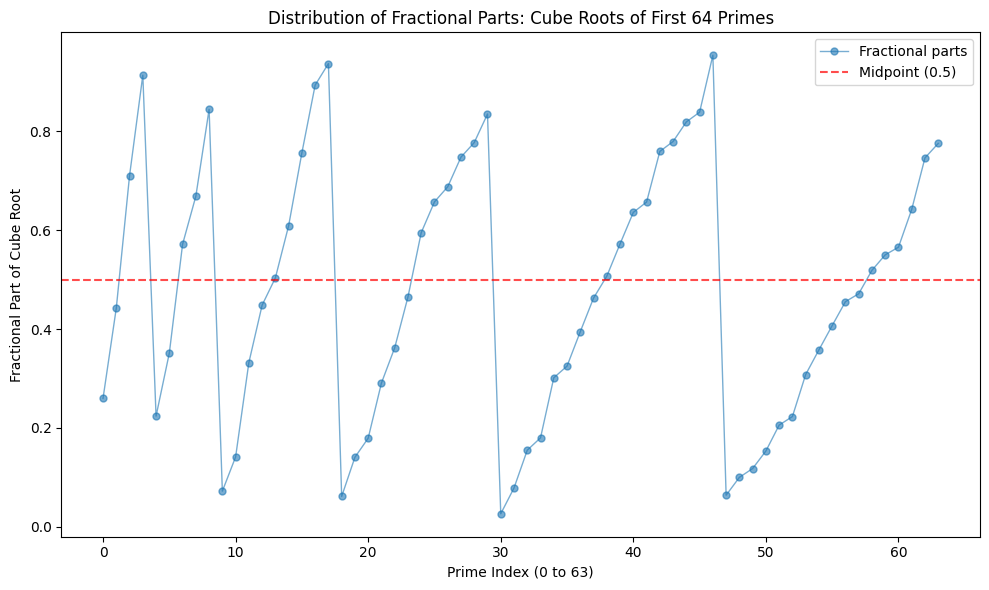

In [41]:
import matplotlib.pyplot as plt

# Create figure (following roots.ipynb style).
fig, ax = plt.subplots(figsize=(10, 6))

# Plot fractional parts vs prime index.
ax.plot(range(64), fractional_parts, 'o-', alpha=0.6, markersize=5, linewidth=1, label='Fractional parts')

# Add midpoint reference line.
ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Midpoint (0.5)')

# Labels and title.
ax.set_xlabel('Prime Index (0 to 63)')
ax.set_ylabel('Fractional Part of Cube Root')
ax.set_title('Distribution of Fractional Parts: Cube Roots of First 64 Primes')

# Add legend.
ax.legend()

# Show plot.
plt.tight_layout()
plt.show()

## Problem 3: Padding

# Problem 4: Hashes

# Problem 5: Passwords

# End